In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
data = pd.read_csv('DiamondsPrices.csv')
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [3]:
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


In [5]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [6]:
cat_cols = data.select_dtypes(include='object').columns.to_list()
num_cols = data.select_dtypes(include=[np.number]).columns.to_list()

EDA

In [7]:
bl_col = data.select_dtypes(include=('boolean')).columns
int_col = data.select_dtypes(include=('int')).columns
str_col = data.select_dtypes(include=('object')).columns
flt_col = data.select_dtypes(include=('float')).columns

In [8]:
data.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


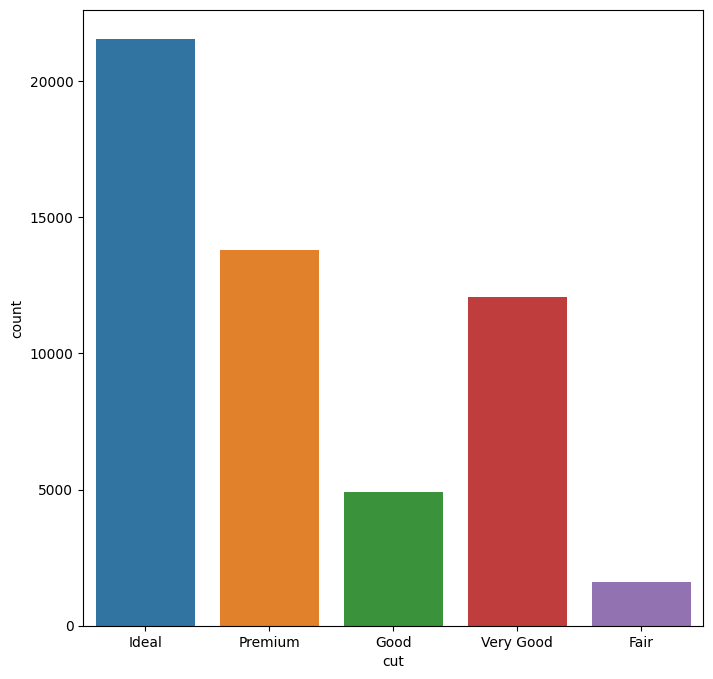

In [9]:
plt.figure(figsize=(8,8))
sns.countplot(data=data,x='cut')
plt.show()

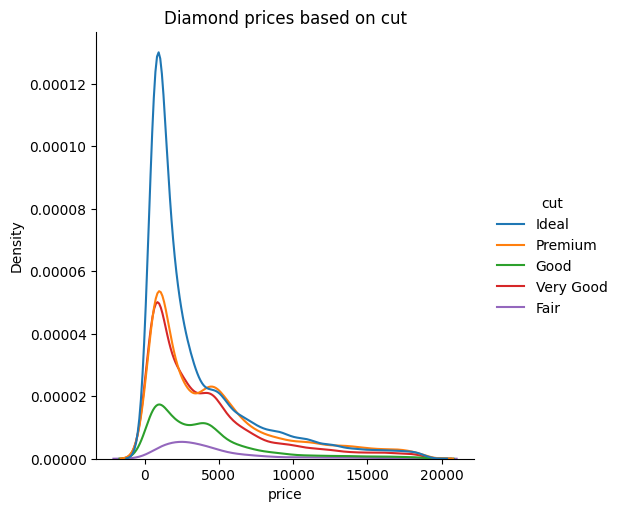

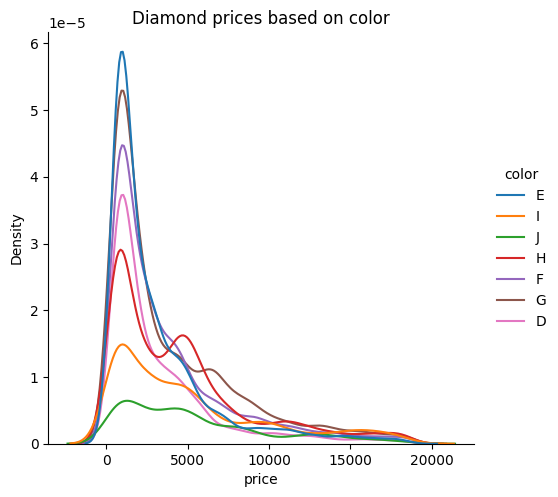

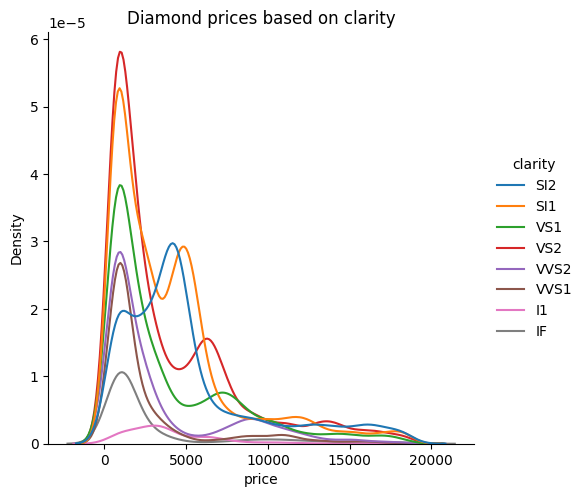

In [10]:
for c in ['cut', 'color', 'clarity']:
    sns.displot(data=data, x="price", hue=c, kind='kde')
    plt.title(f'Diamond prices based on {c.title().lower()}')
    plt.show()

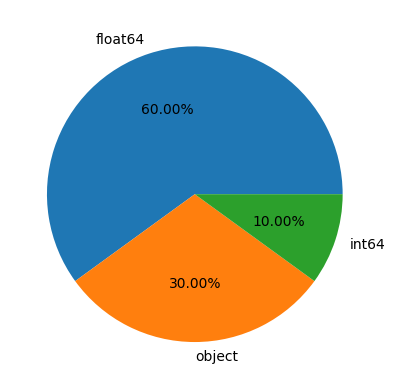

In [11]:
data.dtypes.value_counts().plot.pie(autopct='%0.2f%%')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1507: UserWarning: Ignoring `palette` because no `hue` variable h

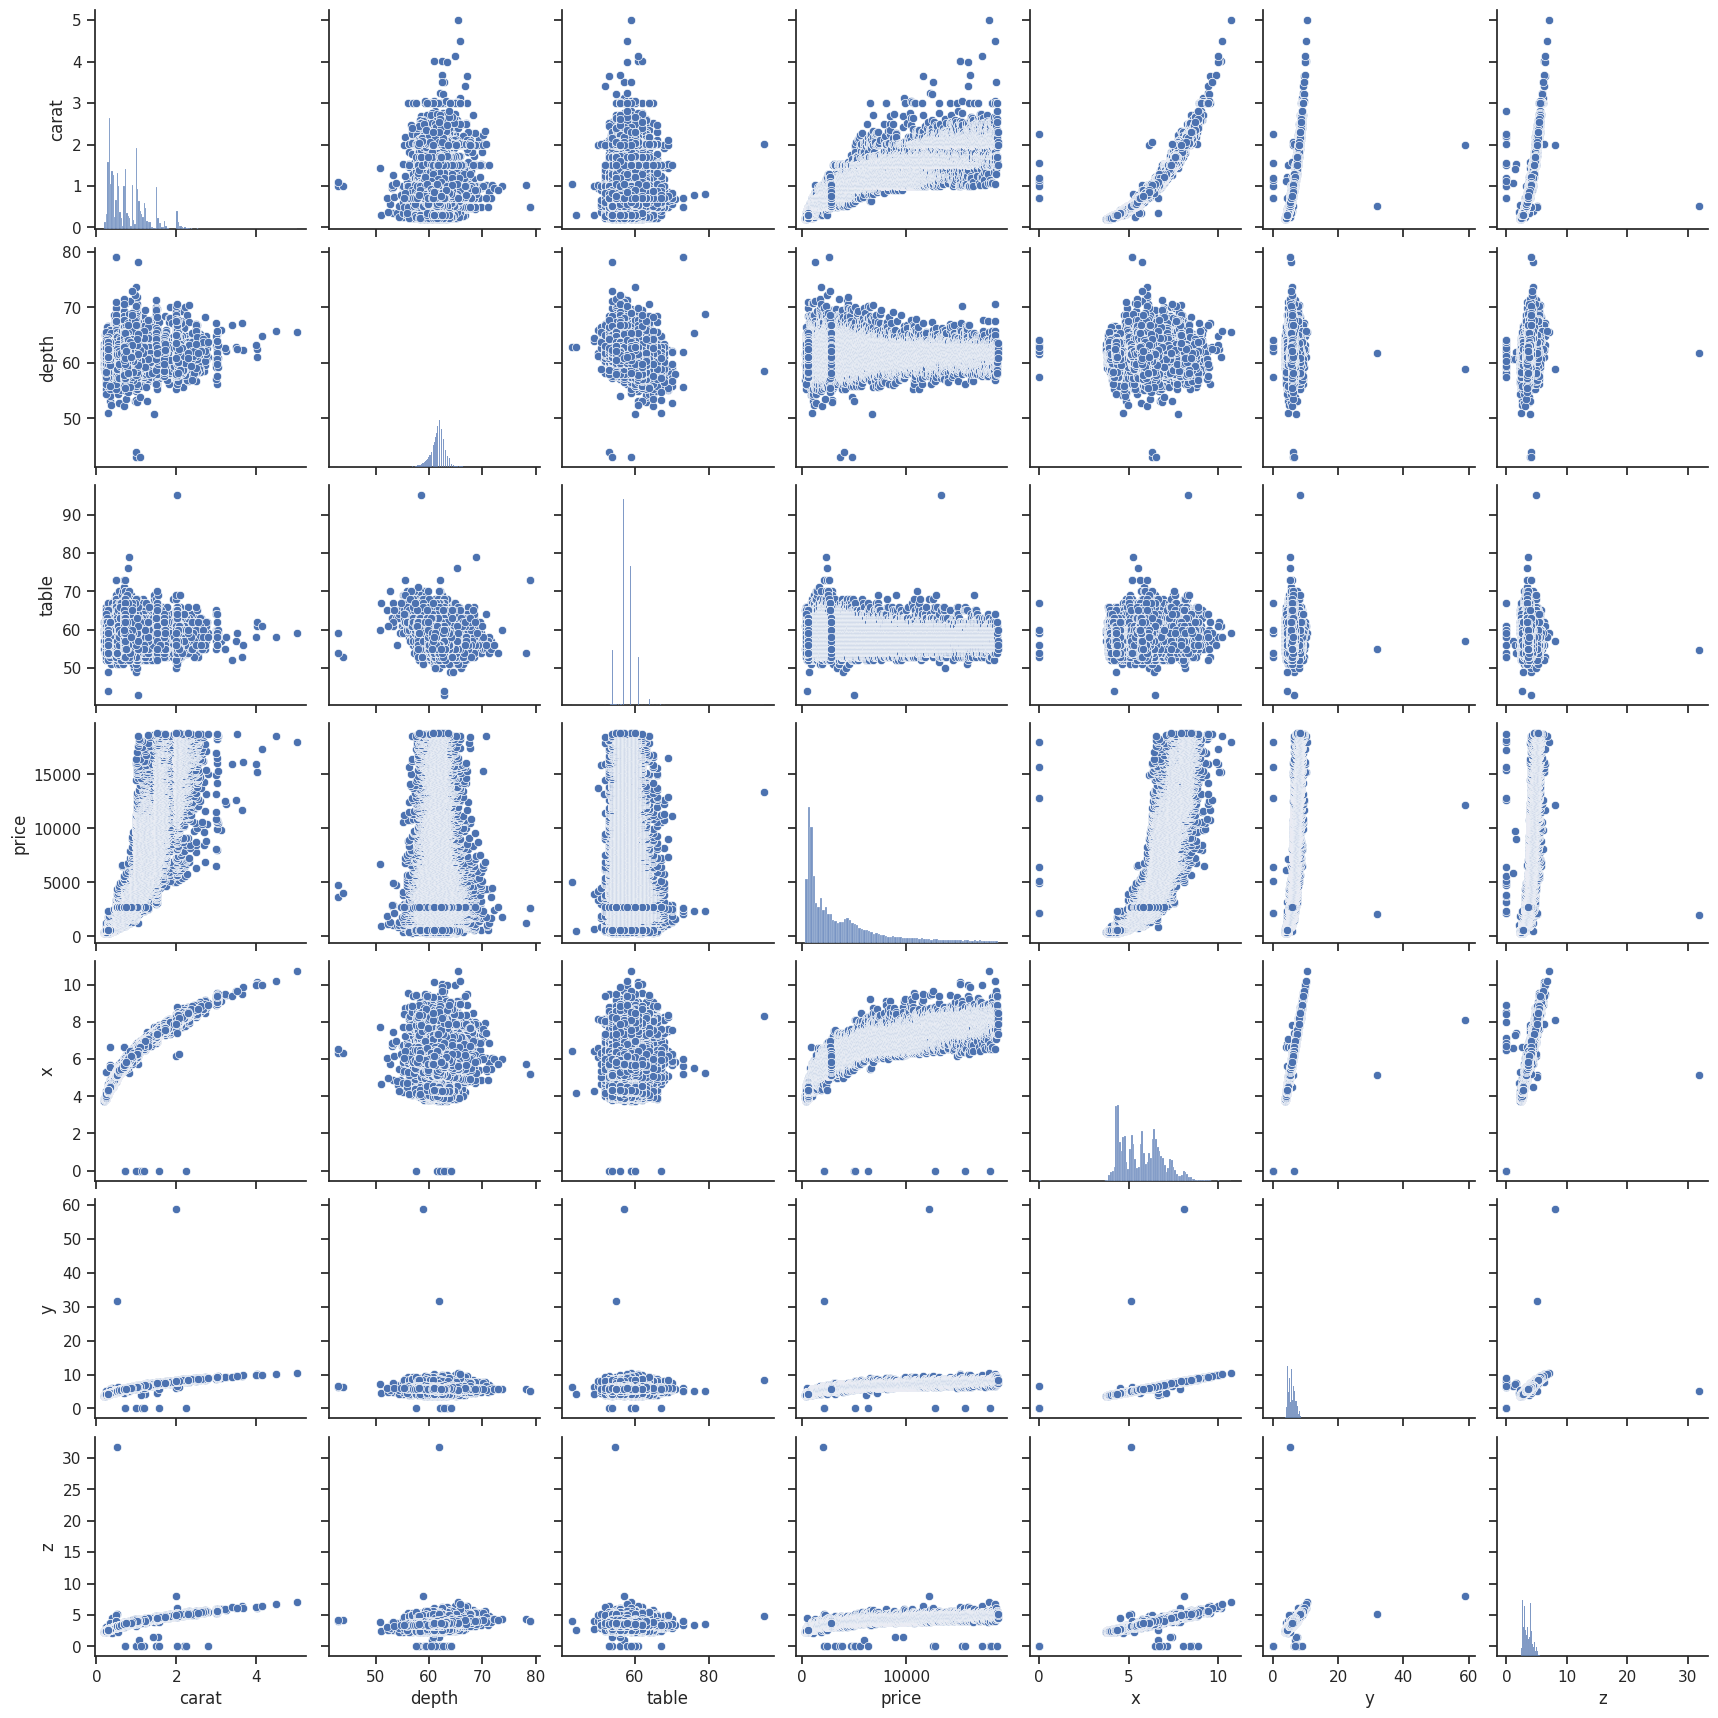

In [12]:
sns.set(style='ticks')
sns.pairplot(data,palette='set1')
plt.show()

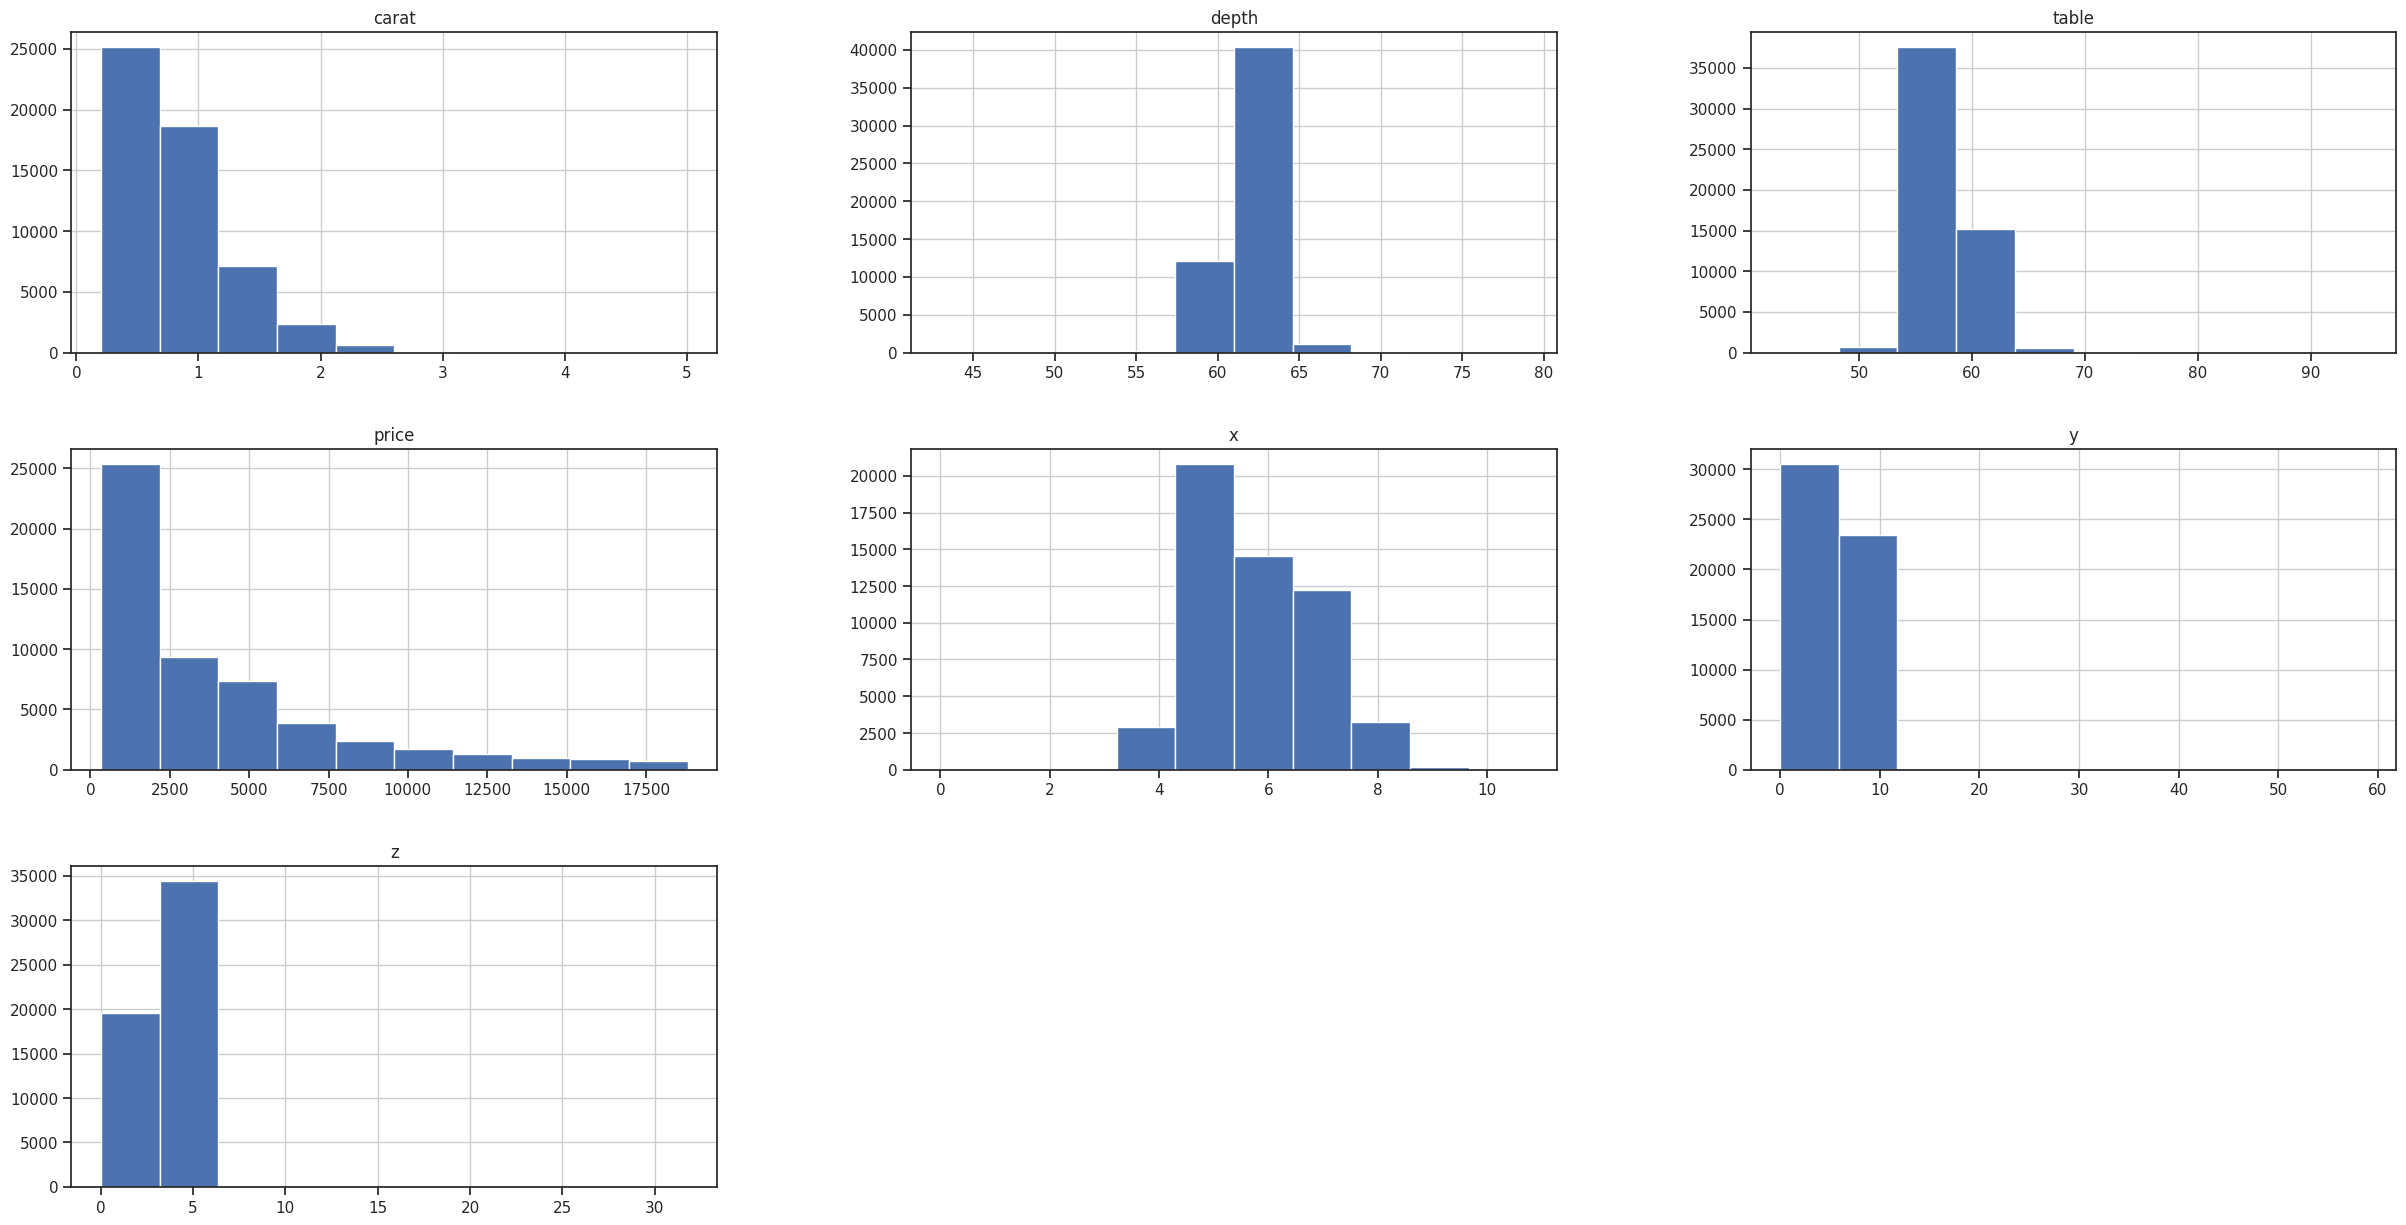

In [13]:
data.hist(figsize=(30,15))
plt.show()

# Data preprocessing and Data cleaning

<ipython-input-14-117916ca8e89>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


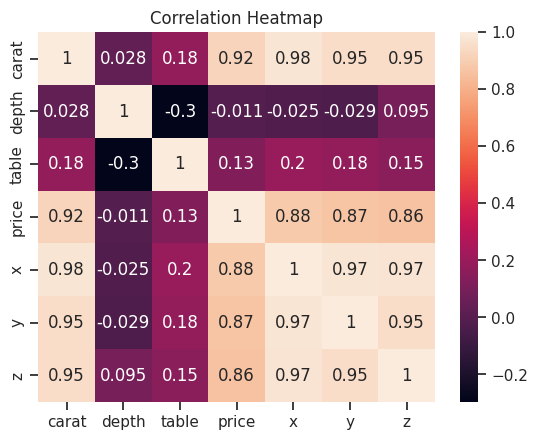

In [14]:
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation Heatmap')
plt.show()

In [15]:
# How each feature affects the price of diamonds.
data.corr()["price"].sort_values(ascending=False)

<ipython-input-15-42ff5a839b05>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()["price"].sort_values(ascending=False)


price    1.000000
carat    0.921591
x        0.884435
y        0.865421
z        0.861249
table    0.127134
depth   -0.010647
Name: price, dtype: float64

In [16]:
#checking for missing values
data.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [17]:
# Checking for duplicate records
duplicates=data.duplicated()
print('No. of duplicate rows =%d' % (duplicates.sum()))
data.drop_duplicates(inplace=True)
data.shape

No. of duplicate rows =146


(53794, 10)

# Label Encoding

In [18]:
#encode the categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['cut'] = labelencoder.fit_transform(data['cut'])
data['color'] = labelencoder.fit_transform(data['color'])
data['clarity'] = labelencoder.fit_transform(data['clarity'])

In [19]:
#price is what we want to predict
X = data.drop(['price'],axis=1)
y=data['price']

# Train,Test,Validation


In [20]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [21]:
#scaling the data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Evaluation and prediction


In [22]:
mean_absolute_error,
def run(model):
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('R2 : ',r2_score(y_test,y_pred))
  print('MAE : ',mean_absolute_error(y_test,y_pred))
  print('MSE : ',mean_squared_error(y_test,y_pred))
  print('RMSE : ',np.sqrt(mean_squared_error(y_test,y_pred)))
  # evaluation of the model
  #plotting y_test & y_pred
  fig=plt.figure()
  plt.scatter(y_test,y_pred)
  fig.suptitle('y_test vs y_Pred',fontsize=15)
#Heading
  plt.xlabel('y_test',fontsize=13)
# X-label
  plt.ylabel('y_pred',fontsize=12)
# Y-label

R2 :  0.8810732051349308
MAE :  848.5289970702934
MSE :  1797291.358960413
RMSE :  1340.6309555431028


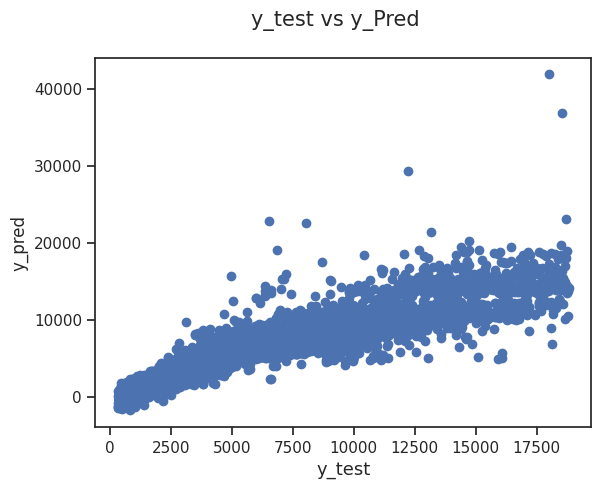

In [23]:
from sklearn.linear_model import LinearRegression
model_1=LinearRegression()
run(model_1)

R2 :  0.9479355382845465
MAE :  476.7825860658785
MSE :  786828.6306401963
RMSE :  887.0336130272608


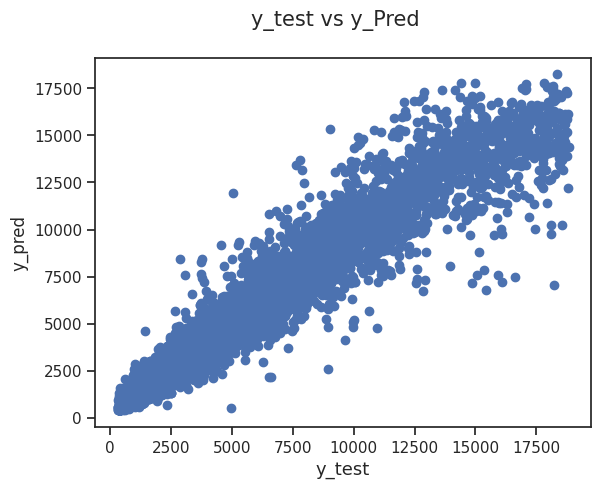

In [24]:

model_2=KNeighborsRegressor(n_neighbors=5,metric='euclidean',weights='uniform',
                             n_jobs=None)
run(model_2)

R2 :  0.9637579814165615
MAE :  362.92021711651427
MSE :  547710.6055468809
RMSE :  740.074729704292


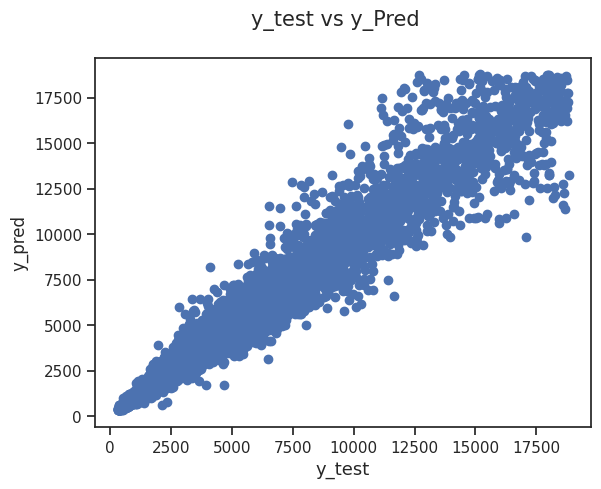

In [25]:
model_3= DecisionTreeRegressor(random_state=1)
run(model_3)

R2 :  0.9817270436214109
MAE :  265.54756108051305
MSE :  276151.6161194798
RMSE :  525.501299826632


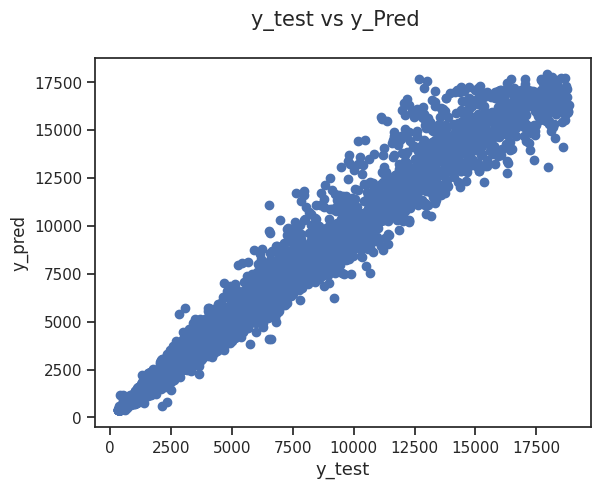

In [26]:
model_4=RandomForestRegressor(n_estimators=100,min_samples_leaf=3,random_state=1)
run(model_4)

R2 :  0.8792951117810274
MAE :  892.2865536938762
MSE :  1824162.946847915
RMSE :  1350.6157658075501


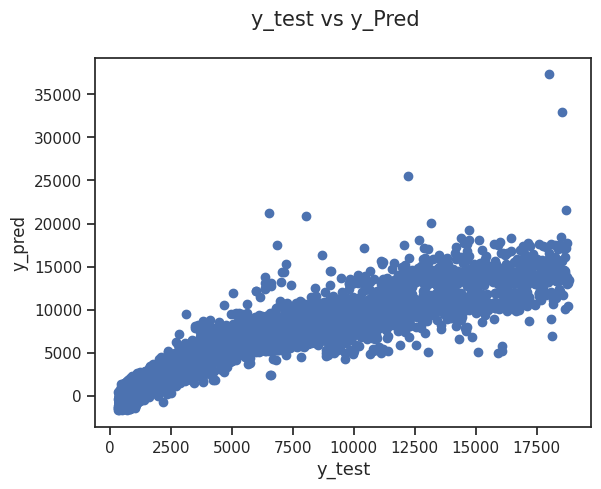

In [27]:
model_5=Ridge(alpha=100,tol=0.001,random_state=1)
run(model_5)

R2 :  0.8640328617156008
MAE :  942.745943381778
MSE :  2054815.0063102616
RMSE :  1433.4625932720608


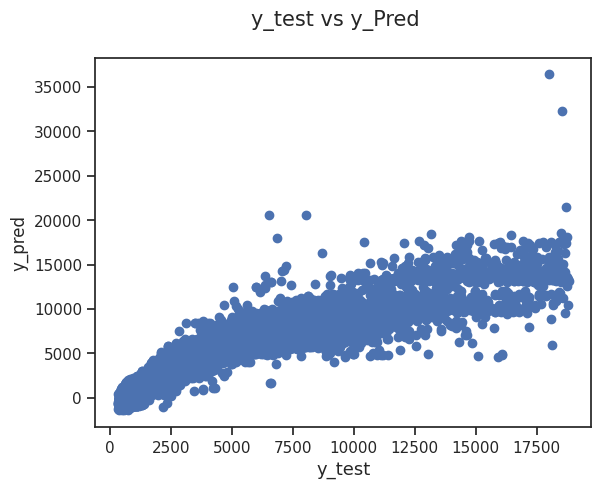

In [28]:
model_6=Lasso(alpha=0.1,precompute=True,positive= True,selection='random',random_state=1)
run(model_6)

RandomForest preformed better than all the other models, it will give 98.17 % accuracy.